In [1]:
import sys
sys.path.append('../../')

In [2]:
#import importlib
#import anomalymarinedetection
#importlib.reload(anomalymarinedetection.utils.read_tif)

In [3]:
%load_ext autoreload
%autoreload 2

In [6]:
import os
import matplotlib.pyplot as plt
import numpy as np
#import cv2 as cv
from osgeo import gdal
import glob
from collections import Counter

In [2]:
from anomalymarinedetection.utils.utils import get_patch_name_from_prediction_name

In [5]:
from anomalymarinedetection.utils.read_tif import acquire_data, tif_2_rgb, tif_2_fdi, tif_2_ndvi, tif_2_swir
from anomalymarinedetection.utils.utils import get_tile_name_from_prediction_name, get_patch_name_from_prediction_name
from anomalymarinedetection.utils.assets import labels

In [4]:
seed = 0
folder_patches = "../../data/patches/" #"../../data/predicted_unet/"
folder_input_images = "../../data/patches/"
tif_ext = ".tif"

In [16]:
i = 0
agg_to_water = False
plot = False
total_pixels_dataset = {}

for file_name in os.listdir(folder_patches):
    annotaions_counter = len(glob.glob1(folder_patches + file_name,"*_cl.tif"))
    for idx_patch in range(annotaions_counter):
        if i >= 0 and i < 10000000:
            index_sub_plot = 0
            tile_name = get_tile_name_from_prediction_name(file_name)
            patch_name = get_patch_name_from_prediction_name(file_name)
            if plot:
                f, axarr = plt.subplots(1, 5, figsize=(15, 5))
                
                
                # Plot rgb image
                tif_path = folder_input_images + tile_name + "/" + patch_name + "_" + str(idx_patch) + tif_ext
                img_rgb = tif_2_rgb(tif_path)
                axarr[index_sub_plot].set_title("Rgb image")
                axarr[index_sub_plot].imshow(img_rgb)
                index_sub_plot += 1
                # Plot swir image
                tif_path = folder_input_images + tile_name + "/" + patch_name + "_" + str(idx_patch) + tif_ext
                img_rgb = tif_2_swir(tif_path)
                axarr[index_sub_plot].set_title("Swir image")
                axarr[index_sub_plot].imshow(img_rgb)
                index_sub_plot += 1
                # Plot fdi image
                tif_path = folder_input_images + tile_name + "/" + patch_name + "_" + str(idx_patch) + tif_ext
                img_rgb = tif_2_fdi(tif_path)
                axarr[index_sub_plot].set_title("Fdi image")
                axarr[index_sub_plot].imshow(img_rgb)
                index_sub_plot += 1
                # Plot ndvi image
                tif_path = folder_input_images + tile_name + "/" + patch_name + "_" + str(idx_patch) + tif_ext
                img_rgb = tif_2_ndvi(tif_path)
                axarr[index_sub_plot].set_title("Ndvi image")
                axarr[index_sub_plot].imshow(img_rgb)
                index_sub_plot += 1
                
            
            # Plot semantic segmentation map
            roi_file_cl = folder_input_images + tile_name + "/" + patch_name + "_" + str(idx_patch) + "_cl" + tif_ext        
            ds = gdal.Open(roi_file_cl)
            temp = np.copy(ds.ReadAsArray().astype(np.int64))
            unique, counts = np.unique(temp, return_counts=True)
            
            labels_in_img = [labels[label_idx - 1] if label_idx > 0 else "0" for label_idx in unique]
            pixels_in_img = dict(zip(labels_in_img, counts))
            
            total_pixels_dataset = dict(Counter(total_pixels_dataset) + Counter(pixels_in_img))

            
            if plot:
                axarr[index_sub_plot].set_title("GT")
                axarr[index_sub_plot].imshow(temp)
                index_sub_plot += 1
            
            # Aggregation
            if agg_to_water:
                temp[temp == 15] = 7  # Mixed Water to Marine Water Class
                temp[temp == 14] = 7  # Wakes to Marine Water Class
                temp[temp == 13] = 7  # Cloud Shadows to Marine Water Class
                temp[temp == 12] = 7  # Waves to Marine Water Class

            # Categories from 1 to 0
            temp = np.copy(temp - 1)
            
            
            # Plot prediction
            #path = folder_predictions + file_name
            #img_pred, _ = acquire_data(path)
            #axarr[index_sub_plot].set_title("Prediction")
            #axarr[index_sub_plot].imshow(img_pred)
            
            print("_" * 40 + f"{file_name}"+ "_" * 40)
            print(pixels_in_img) # pixels for each category in the current image
            if plot:
                plt.show()
    
    i += 1

print("_" * 80 + "\nPixels for each category of the looped images:")
print(total_pixels_dataset)

________________________________________S2_1-12-19_48MYU________________________________________
{'0': 65007, 'Ship': 96, 'Marine Water': 83, 'Wakes': 350}
________________________________________S2_1-12-19_48MYU________________________________________
{'0': 65502, 'Marine Water': 34}
________________________________________S2_1-12-19_48MYU________________________________________
{'0': 65503, 'Marine Debris': 7, 'Ship': 8, 'Marine Water': 18}
________________________________________S2_1-12-19_48MYU________________________________________
{'0': 65128, 'Marine Debris': 4, 'Ship': 75, 'Marine Water': 68, 'Wakes': 261}
________________________________________S2_11-1-19_19QDA________________________________________
{'0': 65516, 'Ship': 11, 'Marine Water': 9}
________________________________________S2_11-1-19_19QDA________________________________________
{'0': 65488, 'Natural Organic Material': 3, 'Turbid Water': 5, 'Shallow Water': 40}
________________________________________S2_11-1-19_19QD

In [8]:
"""
i = 0

for file_name in os.listdir(folder_predictions):
    if i >= 50 and i < 70:
        index_sub_plot = 0
        tile_name = get_tile_name_from_prediction_name(file_name)
        patch_name = get_patch_name_from_prediction_name(file_name)
        
        f, axarr = plt.subplots(1, 5, figsize=(15, 5))
        
        
        # Plot rgb image
        tif_path = folder_input_images + tile_name + "/" + patch_name + "_0" + tif_ext
        img_rgb = tif_2_rgb(tif_path)
        axarr[index_sub_plot].set_title("Rgb image")
        axarr[index_sub_plot].imshow(img_rgb)
        index_sub_plot += 1
        # Plot swir image
        tif_path = folder_input_images + tile_name + "/" + patch_name + "_0" + tif_ext
        img_rgb = tif_2_swir(tif_path)
        axarr[index_sub_plot].set_title("Swir image")
        axarr[index_sub_plot].imshow(img_rgb)
        index_sub_plot += 1
        # Plot fdi image
        tif_path = folder_input_images + tile_name + "/" + patch_name + "_0" + tif_ext
        img_rgb = tif_2_fdi(tif_path)
        axarr[index_sub_plot].set_title("Fdi image")
        axarr[index_sub_plot].imshow(img_rgb)
        index_sub_plot += 1
        # Plot ndvi image
        tif_path = folder_input_images + tile_name + "/" + patch_name + "_0" + tif_ext
        img_rgb = tif_2_ndvi(tif_path)
        axarr[index_sub_plot].set_title("Ndvi image")
        axarr[index_sub_plot].imshow(img_rgb)
        index_sub_plot += 1
        # Plot semantic segmentation map
        tif_path = folder_input_images + tile_name + "/" + patch_name + "_0" + "_cl" + tif_ext
        img_pred, _ = acquire_data(tif_path)
        axarr[index_sub_plot].set_title("GT")
        axarr[index_sub_plot].imshow(img_pred)
        index_sub_plot += 1
        # Plot prediction
        #path = folder_predictions + file_name
        #img_pred, _ = acquire_data(path)
        #axarr[index_sub_plot].set_title("Prediction")
        #axarr[index_sub_plot].imshow(img_pred)
        
        print("_" * 40 + f"{file_name}"+ "_" * 40)

        plt.show()
    
    i += 1
"""

'\ni = 0\n\nfor file_name in os.listdir(folder_predictions):\n    if i >= 50 and i < 70:\n        index_sub_plot = 0\n        tile_name = get_tile_name_from_prediction_name(file_name)\n        patch_name = get_patch_name_from_prediction_name(file_name)\n        \n        f, axarr = plt.subplots(1, 5, figsize=(15, 5))\n        \n        \n        # Plot rgb image\n        tif_path = folder_input_images + tile_name + "/" + patch_name + "_0" + tif_ext\n        img_rgb = tif_2_rgb(tif_path)\n        axarr[index_sub_plot].set_title("Rgb image")\n        axarr[index_sub_plot].imshow(img_rgb)\n        index_sub_plot += 1\n        # Plot swir image\n        tif_path = folder_input_images + tile_name + "/" + patch_name + "_0" + tif_ext\n        img_rgb = tif_2_swir(tif_path)\n        axarr[index_sub_plot].set_title("Swir image")\n        axarr[index_sub_plot].imshow(img_rgb)\n        index_sub_plot += 1\n        # Plot fdi image\n        tif_path = folder_input_images + tile_name + "/" + patch_

In [13]:
import os
import ast
import sys
import json
import random
import logging
import argparse
import numpy as np
from tqdm import tqdm
from os.path import dirname as up

import torch
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader

from src.semantic_segmentation.unet.dataloader import (
    GenDEBRIS,
    bands_mean,
    bands_std,
    RandomRotationTransform,
    class_distr,
    gen_weights,
)


def seed_all(seed):
    # Pytorch Reproducibility
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False


def seed_worker(worker_id):
    # DataLoader Workers Reproducibility
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)

seed_all(0)
g = torch.Generator()
g.manual_seed(0)

# Transformations

transform_train = transforms.Compose(
    [
        transforms.ToTensor(),
        RandomRotationTransform([-90, 0, 90, 180]),
        transforms.RandomHorizontalFlip(),
    ]
)

transform_test = transforms.Compose([transforms.ToTensor()])

standardization = transforms.Normalize(bands_mean, bands_std)


dataset_train = GenDEBRIS(
    "train",
    transform=transform_train,
    standardization=standardization,
    agg_to_water=True,
    path="/data/marine-debris.github.io/data"
)


train_loader = DataLoader(
    dataset_train,
    batch_size=1,
    shuffle=True,
    num_workers=1,
    pin_memory=True,
    prefetch_factor=True,
    persistent_workers=True,
    worker_init_fn=seed_worker,
    generator=g,
)

Load train set to memory: 100%|██████████| 694/694 [00:07<00:00, 93.82it/s] 


In [19]:
def s2_2_rgb(s2_img: str) -> np.ndarray:
    img_b = s2_img[1, :, :].reshape(s2_img.shape[-2], s2_img.shape[-1], 1)
    img_g = s2_img[2, :, :].reshape(s2_img.shape[-2], s2_img.shape[-1], 1)
    img_r = s2_img[3, :, :].reshape(s2_img.shape[-2], s2_img.shape[-1], 1)

    img_rgb = np.concatenate((img_r, img_g, img_b), 2)
    print(img_rgb.shape)
    img_rgb = img_rgb / img_rgb.max()
    return img_rgb

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(-0.2881) tensor(0.2284)
torch.Size([11, 256, 256])
(11, 256, 256)
(256, 256, 3)
[-1  9]
-1.2140551 1.0


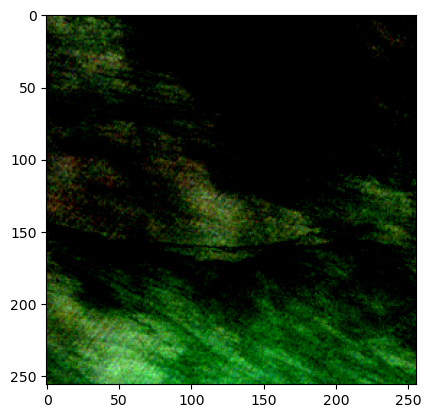

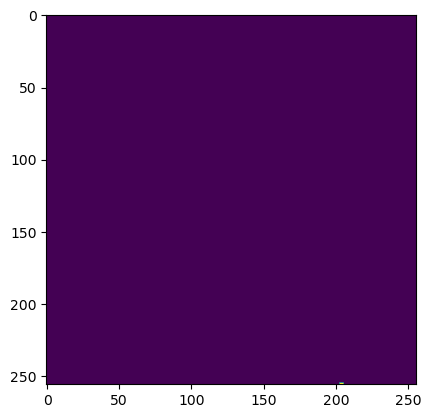

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(-0.5905) tensor(-0.1109)
torch.Size([11, 256, 256])
(11, 256, 256)
(256, 256, 3)
[-1 10]
1.0 5.323493


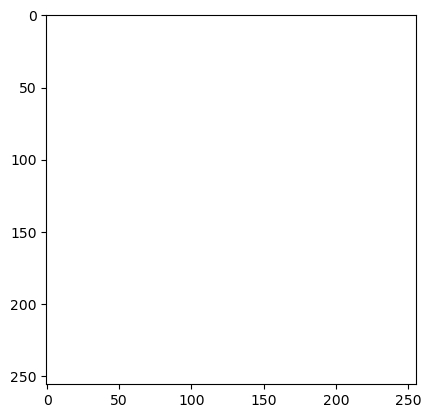

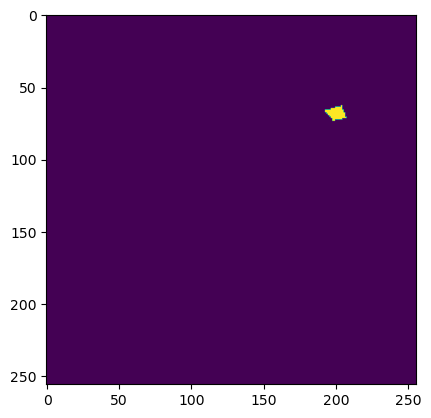

tensor(0.5271) tensor(7.5515)
torch.Size([11, 256, 256])
(11, 256, 256)
(256, 256, 3)
[-1  5]
0.11254518 1.0


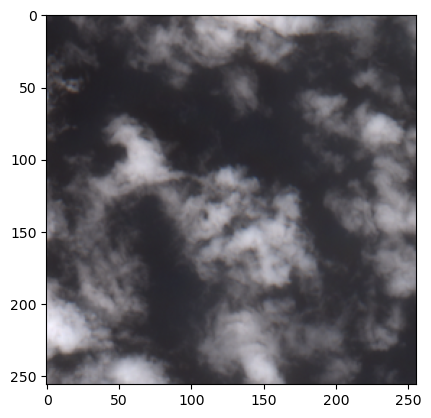

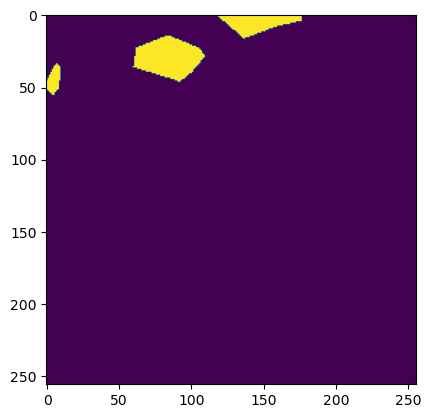

In [20]:
j = 0
n = 2
for img, target in train_loader:
    img = img[0]
    print(torch.min(img), torch.max(img))
    print(img.shape)
    img = np.array(img)
    print(img.shape)
    j += 1
    rgb_img = s2_2_rgb(img)
    print(np.unique(target))
    print(np.min(rgb_img), np.max(rgb_img))
    plt.imshow(rgb_img, vmin=0, vmax=255)
    plt.show()
    plt.imshow(target[0])
    plt.show()
    if j > n:
        break

array([-1, 10])

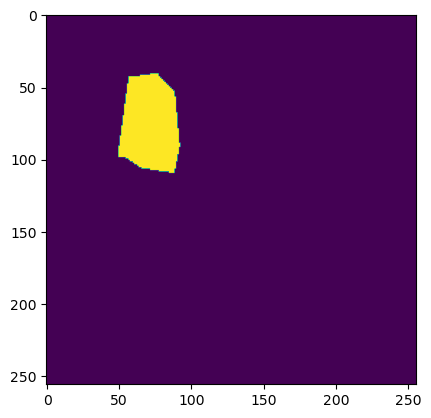